In [1]:
from google.colab import files
uploaded = files.upload()

import io, pandas as pd
df = pd.read_csv(io.BytesIO(next(iter(uploaded.values()))))
df.head()


Saving Crop_recommendation.csv to Crop_recommendation.csv


N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice

In [2]:
print(df.shape)
df.info()
print(df['label'].value_counts())

# Quick stats
df.describe()


(2200, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB
label
rice           100
maize          100
chickpea       100
kidneybeans    100
pigeonpeas     100
mothbeans      100
mungbean       100
blackgram      100
lentil         100
pomegranate    100
banana         100
mango          100
grapes         100
watermelon     100
muskmelon      100
apple          100
orange         100
papaya         100
coconut        100
cotton         100
jute          

N            P            K  temperature     humidity  \
count  2200.000000  2200.000000  2200.000000  2200.000000  2200.000000   
mean     50.551818    53.362727    48.149091    25.616244    71.481779   
std      36.917334    32.985883    50.647931     5.063749    22.263812   
min       0.000000     5.000000     5.000000     8.825675    14.258040   
25%      21.000000    28.000000    20.000000    22.769375    60.261953   
50%      37.000000    51.000000    32.000000    25.598693    80.473146   
75%      84.250000    68.000000    49.000000    28.561654    89.948771   
max     140.000000   145.000000   205.000000    43.675493    99.981876   

                ph     rainfall  
count  2200.000000  2200.000000  
mean      6.469480   103.463655  
std       0.773938    54.958389  
min       3.504752    20.211267  
25%       5.971693    64.551686  
50%       6.425045    94.867624  
75%       6.923643   124.267508  
max       9.935091   298.560117

In [3]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Encode labels
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])

# Split into features and target
X = df.drop('label', axis=1)
y = df['label']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


🌾 Random Forest Accuracy: 99.55%

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.95      0.97        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      1.00      1.00        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       1.00      1.00      1.00        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00

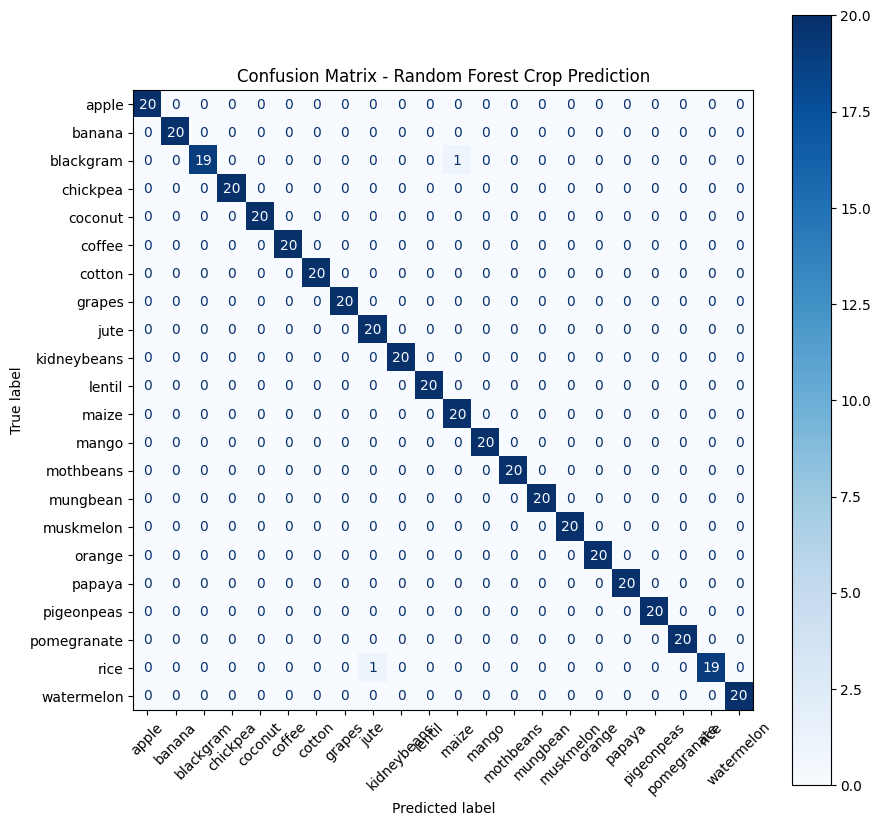

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier

# ✅ Step 1: Train the Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# ✅ Step 2: Make predictions
y_pred = rf.predict(X_test)

# ✅ Step 3: Evaluate model
print(f"🌾 Random Forest Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")
print("\nClassification Report:\n", classification_report(y_test, y_pred, target_names=le.classes_))

# ✅ Step 4: Plot Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 10))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=45, ax=plt.gca())
plt.title("Confusion Matrix - Random Forest Crop Prediction")
plt.show()


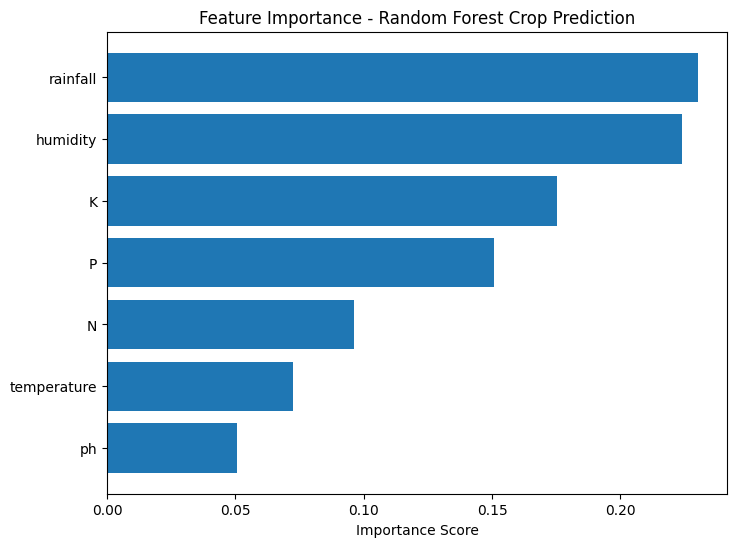

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = rf.feature_importances_
features = X.columns

# Create DataFrame for sorting and visualization
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
plt.barh(importance_df['Feature'], importance_df['Importance'])
plt.gca().invert_yaxis()
plt.title("Feature Importance - Random Forest Crop Prediction")
plt.xlabel("Importance Score")
plt.show()


In [7]:
def predict_crop_user_input():
    print("🌾 Enter the environmental and soil details below:")

    N = float(input("Nitrogen content (N): "))
    P = float(input("Phosphorus content (P): "))
    K = float(input("Potassium content (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value: "))
    rainfall = float(input("Rainfall (mm): "))

    # Prepare and scale input
    import numpy as np
    input_data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    scaled_data = scaler.transform(input_data)

    # Predict
    prediction = rf.predict(scaled_data)
    crop_name = le.inverse_transform(prediction)[0]
    print(f"\n✅ Recommended Crop: **{crop_name.upper()}**")

# Run the function
predict_crop_user_input()
4

🌾 Enter the environmental and soil details below:
Nitrogen content (N): 40
Phosphorus content (P): 72
Potassium content (K): 77
Temperature (°C): 17.02
Humidity (%): 16.98
pH value: 7.48
Rainfall (mm): 88.55

✅ Recommended Crop: **CHICKPEA**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


4

In [8]:
from sklearn.metrics import accuracy_score, classification_report

# Predictions
y_pred = rf.predict(X_test)

# Accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"🌾 Random Forest Model Accuracy: {accuracy * 100:.2f}%")


🌾 Random Forest Model Accuracy: 99.55%


🌳 Decision Tree Accuracy: 97.95 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      0.80      0.89        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      0.95      0.95        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.86      0.90      0.88        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.86      0.95      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.0

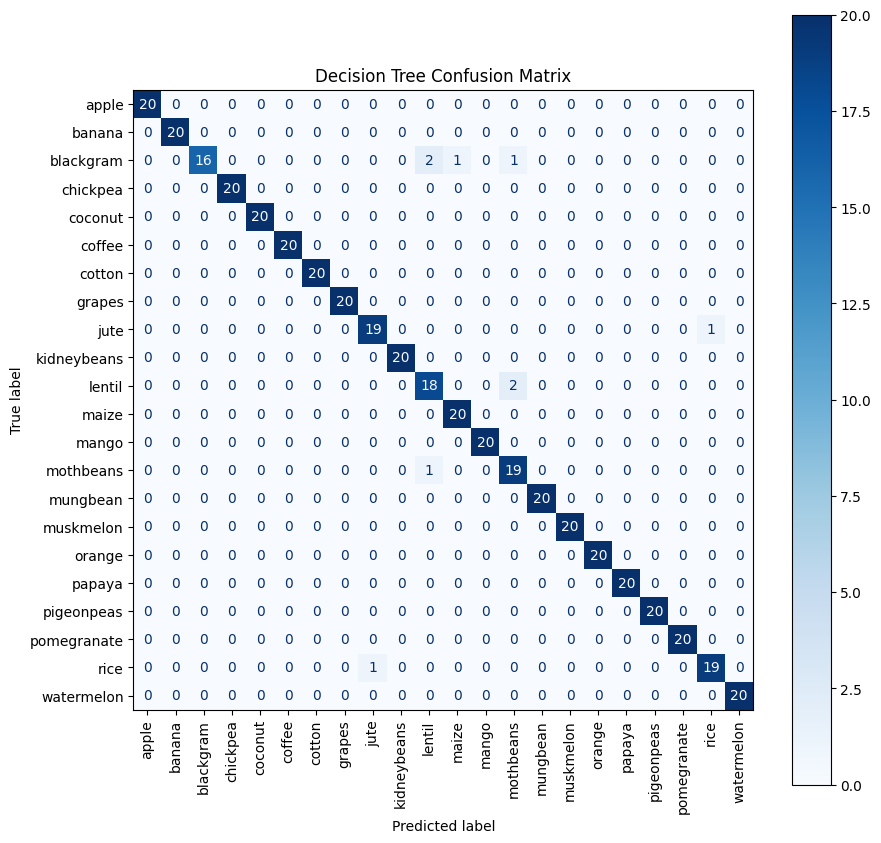

In [9]:
from sklearn.tree import DecisionTreeClassifier

# Train
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict
y_pred_dt = dt.predict(X_test)

# Evaluate
print("🌳 Decision Tree Accuracy:", round(accuracy_score(y_test, y_pred_dt) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_dt, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=90, ax=plt.gca())
plt.title("Decision Tree Confusion Matrix")
plt.show()


⚡ SVM Accuracy: 98.41 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       0.91      1.00      0.95        20
      grapes       1.00      1.00      1.00        20
        jute       0.87      1.00      0.93        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      1.00      1.00        20
       maize       1.00      0.90      0.95        20
       mango       0.95      1.00      0.98        20
   mothbeans       1.00      0.95      0.97        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00      1.0

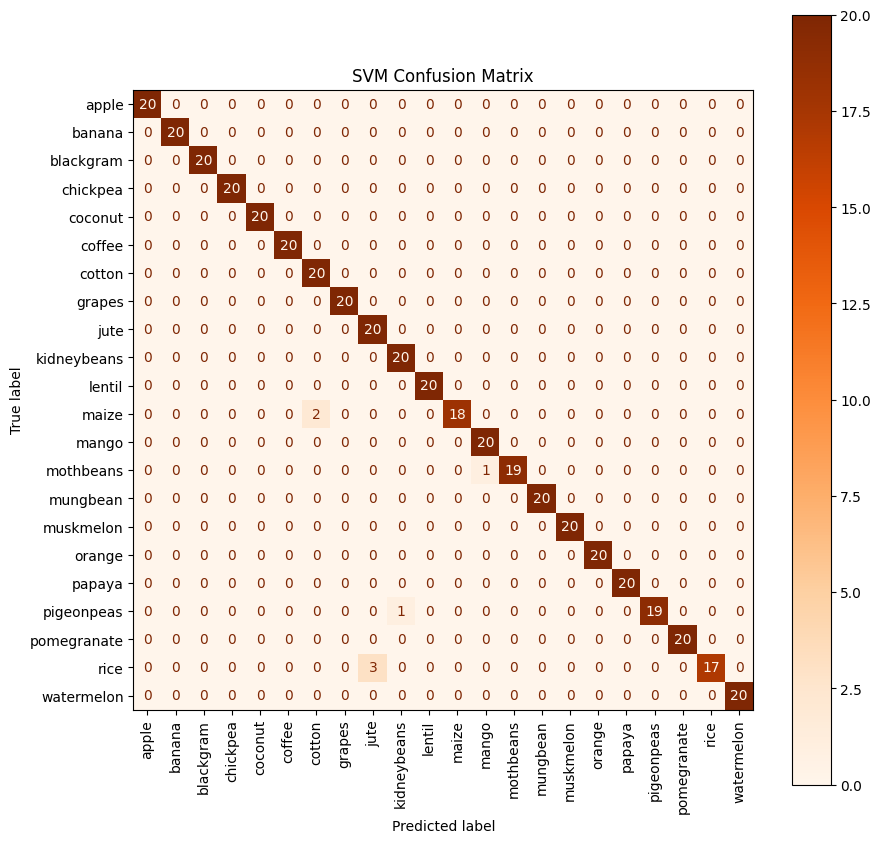

In [10]:
from sklearn.svm import SVC

# Train
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)

# Predict
y_pred_svm = svm.predict(X_test)

# Evaluate
print("⚡ SVM Accuracy:", round(accuracy_score(y_test, y_pred_svm) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_svm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Oranges', xticks_rotation=90, ax=plt.gca())
plt.title("SVM Confusion Matrix")
plt.show()


📈 Logistic Regression Accuracy: 97.27 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      1.00      0.98        20
    chickpea       1.00      1.00      1.00        20
     coconut       0.95      1.00      0.98        20
      coffee       1.00      1.00      1.00        20
      cotton       0.95      1.00      0.98        20
      grapes       1.00      1.00      1.00        20
        jute       0.83      1.00      0.91        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       0.94      0.85      0.89        20
       maize       1.00      0.95      0.97        20
       mango       0.95      1.00      0.98        20
   mothbeans       0.90      0.90      0.90        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange    

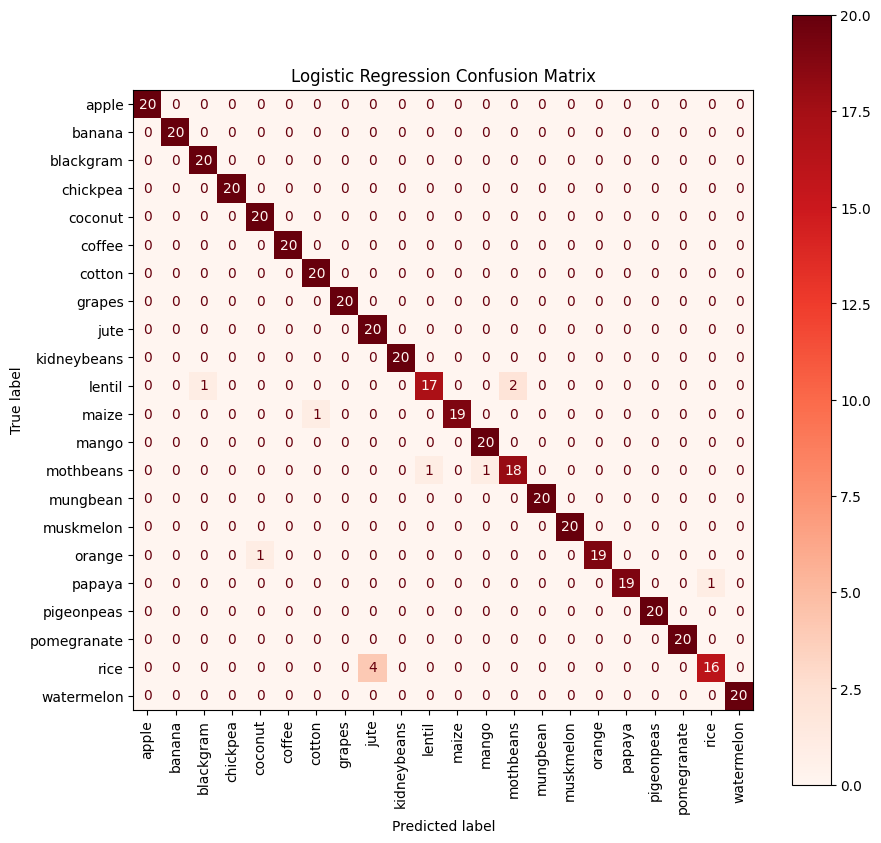

In [11]:
from sklearn.linear_model import LogisticRegression

# Train
lr = LogisticRegression(max_iter=2000, random_state=42)
lr.fit(X_train, y_train)

# Predict
y_pred_lr = lr.predict(X_test)

# Evaluate
print("📈 Logistic Regression Accuracy:", round(accuracy_score(y_test, y_pred_lr) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lr, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_lr)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Reds', xticks_rotation=90, ax=plt.gca())
plt.title("Logistic Regression Confusion Matrix")
plt.show()


💎 XGBoost Accuracy: 99.32 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       1.00      1.00      1.00        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       1.00      1.00      1.00        20
      lentil       1.00      0.90      0.95        20
       maize       1.00      1.00      1.00        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       0.95      1.00      0.98        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00     

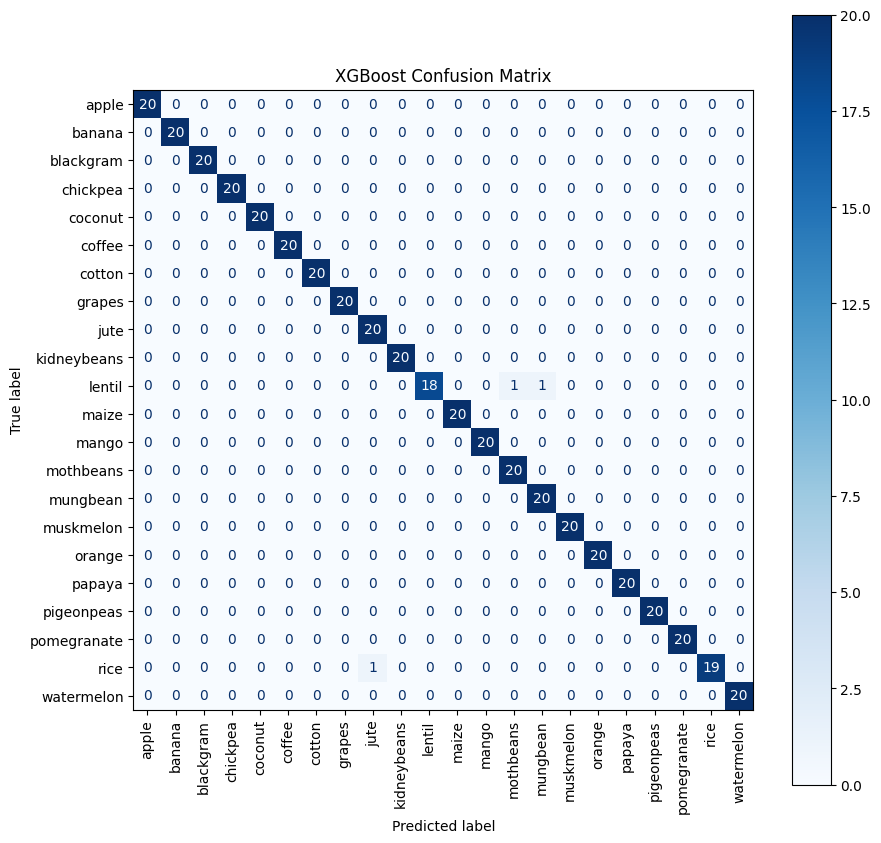

In [12]:
!pip install xgboost -q
from xgboost import XGBClassifier

# Train
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)

# Predict
y_pred_xgb = xgb.predict(X_test)

# Evaluate
print("💎 XGBoost Accuracy:", round(accuracy_score(y_test, y_pred_xgb) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_xgb, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Blues', xticks_rotation=90, ax=plt.gca())
plt.title("XGBoost Confusion Matrix")
plt.show()


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000241 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


⚡ LightGBM Accuracy: 98.86 %

Classification Report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      0.95      0.95        20
    chickpea       1.00      1.00      1.00        20
     coconut       1.00      1.00      1.00        20
      coffee       1.00      1.00      1.00        20
      cotton       1.00      1.00      1.00        20
      grapes       1.00      1.00      1.00        20
        jute       0.95      1.00      0.98        20
 kidneybeans       0.95      1.00      0.98        20
      lentil       1.00      0.95      0.97        20
       maize       0.95      1.00      0.98        20
       mango       1.00      1.00      1.00        20
   mothbeans       0.95      1.00      0.98        20
    mungbean       1.00      1.00      1.00        20
   muskmelon       1.00      1.00      1.00        20
      orange       1.00    

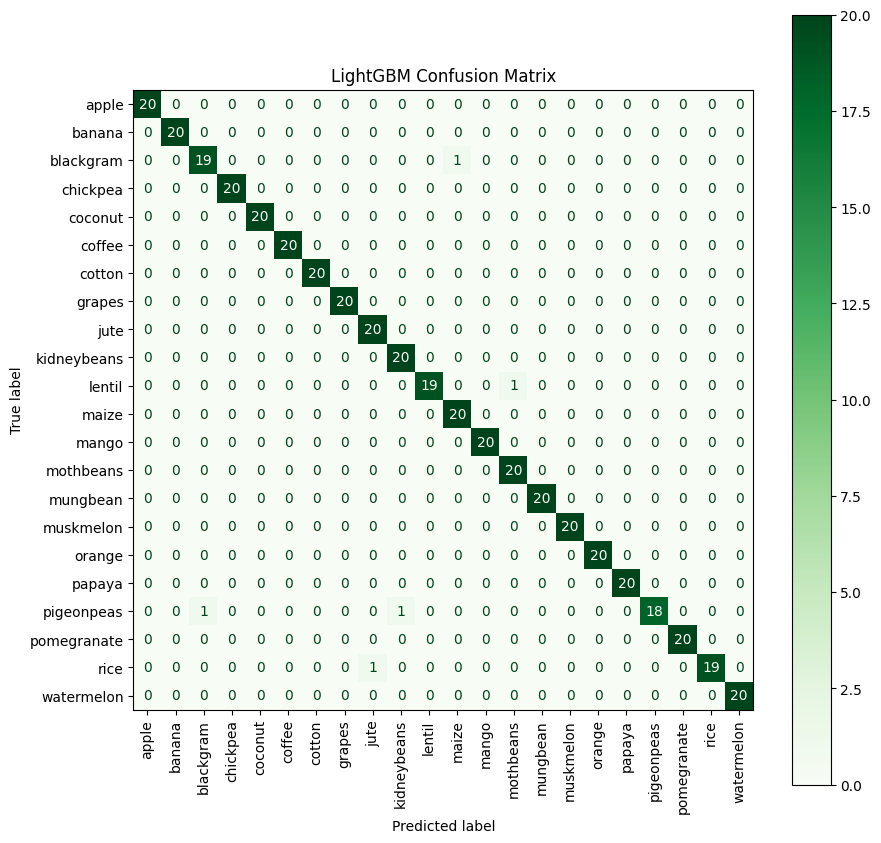

In [13]:
!pip install lightgbm -q
from lightgbm import LGBMClassifier

# Train
lgbm = LGBMClassifier(random_state=42)
lgbm.fit(X_train, y_train)

# Predict
y_pred_lgbm = lgbm.predict(X_test)

# Evaluate
print("⚡ LightGBM Accuracy:", round(accuracy_score(y_test, y_pred_lgbm) * 100, 2), "%")
print("\nClassification Report:\n", classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

# Confusion matrix
plt.figure(figsize=(10,10))
cm = confusion_matrix(y_test, y_pred_lgbm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(cmap='Greens', xticks_rotation=90, ax=plt.gca())
plt.title("LightGBM Confusion Matrix")
plt.show()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.6 MB/s eta 0:00:00
0:	learn: 2.3829134	test: 2.3819487	best: 2.3819487 (0)	total: 66.3ms	remaining: 19.8s
50:	learn: 0.1166161	test: 0.1331355	best: 0.1331355 (50)	total: 1.44s	remaining: 7.05s
100:	learn: 0.0456975	test: 0.0603971	best: 0.0603971 (100)	total: 2.35s	remaining: 4.64s
150:	learn: 0.0273218	test: 0.0418441	best: 0.0418441 (150)	total: 3.27s	remaining: 3.23s
200:	learn: 0.0194980	test: 0.0336602	best: 0.0336602 (200)	total: 4.16s	remaining: 2.05s
250:	learn: 0.0150977	test: 0.0286993	best: 0.0286993 (250)	total: 5.13s	remaining: 1s
299:	learn: 0.0122007	test: 0.0250620	best: 0.0250620 (299)	total: 6.07s	remaining: 0us

bestTest = 0.02506200309
bestIteration = 299

CatBoost Accuracy: 0.9954545454545455

Classification report:
               precision    recall  f1-score   support

       apple       1.00      1.00      1.00        20
      banana       1.00      1.00      1.00        20
   blackgram       0.95      

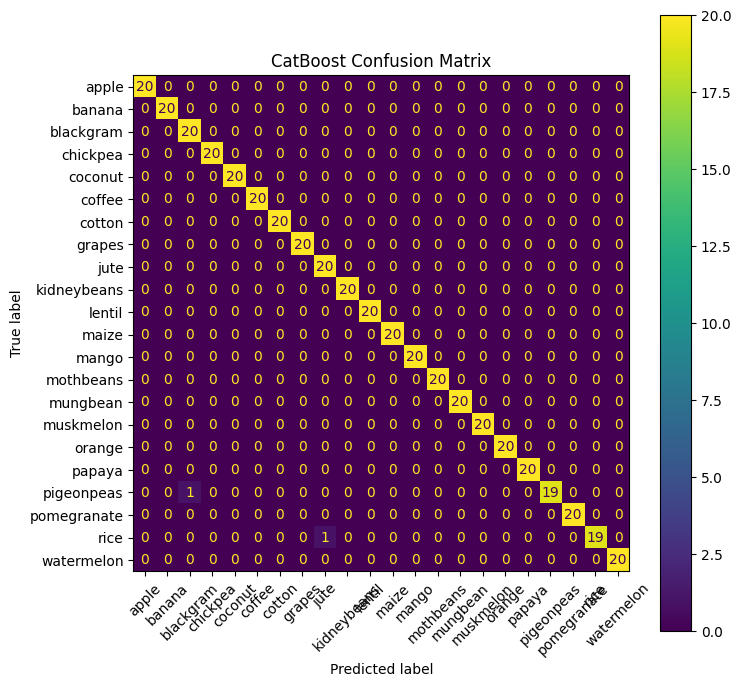

In [14]:
# install if not installed
!pip install -q catboost

from catboost import CatBoostClassifier, Pool
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Use a smaller number of iterations and early stopping for quick experiments
cat = CatBoostClassifier(
    iterations=300,           # max number of boosting rounds (reduced for speed)
    learning_rate=0.1,        # reasonable default
    depth=6,                  # tree depth
    eval_metric='MultiClass', # multi-class metric
    random_seed=42,
    verbose=50,               # print progress every 50 iterations
    task_type='CPU',          # use CPU (change to 'GPU' only if GPU is available)
    thread_count=2,           # limit CPU threads so Colab stays responsive
    early_stopping_rounds=30, # stop if no improvement on eval set
    use_best_model=True
)

# If you scaled features earlier (scaler), use scaled data; otherwise use X_train/X_test
# Example assumes X_train and X_test are numpy arrays or DataFrames and y_train/y_test are defined
eval_pool = Pool(X_test, y_test)

# Fit with eval_set for early stopping and monitoring
cat.fit(X_train, y_train, eval_set=eval_pool)

# Predict and evaluate
y_pred_cat = cat.predict(X_test)
print("CatBoost Accuracy:", accuracy_score(y_test, y_pred_cat))
print("\nClassification report:\n", classification_report(y_test, y_pred_cat, target_names=le.classes_))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_cat)
plt.figure(figsize=(8,8))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
disp.plot(ax=plt.gca(), xticks_rotation=45)
plt.title("CatBoost Confusion Matrix")
plt.show()

# Save model
cat.save_model("catboost_model.cbm")


In [15]:
import numpy as np

def predict_crop_catboost():
    print("🌾 Enter the environmental and soil details below:")

    # Taking input from user
    N = float(input("Nitrogen content (N): "))
    P = float(input("Phosphorus content (P): "))
    K = float(input("Potassium content (K): "))
    temperature = float(input("Temperature (°C): "))
    humidity = float(input("Humidity (%): "))
    ph = float(input("pH value: "))
    rainfall = float(input("Rainfall (mm): "))

    # Prepare and scale the data
    data = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    data_scaled = scaler.transform(data)

    # Predict using CatBoost model
    prediction = cat.predict(data_scaled)
    crop_name = le.inverse_transform(prediction)[0]

    print(f"\n✅ Recommended Crop: **{crop_name.upper()}**")

# Run the prediction function
predict_crop_catboost()


🌾 Enter the environmental and soil details below:
Nitrogen content (N): 40
Phosphorus content (P): 72
Potassium content (K): 77
Temperature (°C): 17.02
Humidity (%): 16.98
pH value: 7.48
Rainfall (mm): 88.55

✅ Recommended Crop: **CHICKPEA**


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [16]:
!pip install catboost -q
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Train CatBoost
cat = CatBoostClassifier(verbose=0, random_state=42)
cat.fit(X_train, y_train)

# Predict probabilities from both models
rf_pred_proba = rf.predict_proba(X_test)
cat_pred_proba = cat.predict_proba(X_test)

# Average probabilities (soft voting)
avg_pred_proba = (rf_pred_proba + cat_pred_proba) / 2
final_pred = np.argmax(avg_pred_proba, axis=1)

# Evaluate accuracy
acc = accuracy_score(y_test, final_pred)
print(f"🌿 Hybrid RandomForest + CatBoost Accuracy: {acc * 100:.2f}%")


🌿 Hybrid RandomForest + CatBoost Accuracy: 99.77%


In [17]:
# Check which of the required objects exist
required_objects = ['rf', 'cat', 'scaler', 'le']
for obj in required_objects:
    if obj in globals():
        print(f"✅ {obj} is available in memory.")
    else:
        print(f"❌ {obj} is NOT found — you may need to load or train it.")


✅ rf is available in memory.
✅ cat is available in memory.
✅ scaler is available in memory.
✅ le is available in memory.


In [18]:
!pip install -q gradio


In [19]:
import gradio as gr
import numpy as np
import pandas as pd

# Function to predict crop
def predict_crop(N, P, K, temperature, humidity, ph, rainfall, model_choice, cat_weight):
    X = np.array([[N, P, K, temperature, humidity, ph, rainfall]])
    X_scaled = scaler.transform(X)

    if model_choice == "Random Forest":
        proba = rf.predict_proba(X_scaled)[0]
    elif model_choice == "CatBoost":
        proba = cat.predict_proba(X_scaled)[0]
    else:  # Hybrid
        rf_proba = rf.predict_proba(X_scaled)[0]
        cat_proba = cat.predict_proba(X_scaled)[0]
        proba = (1 - cat_weight) * rf_proba + cat_weight * cat_proba

    # Get top 5 predicted crops
    sorted_idx = np.argsort(proba)[::-1]
    top5 = [(le.inverse_transform([i])[0], float(proba[i])) for i in sorted_idx[:5]]
    best_crop = top5[0][0]
    df = pd.DataFrame(top5, columns=["Crop", "Probability"])
    return best_crop, df

# Build Gradio UI
with gr.Blocks(title="🌾 Crop Recommendation App") as demo:
    gr.Markdown("## 🌾 Crop Recommendation System — Hybrid (Random Forest + CatBoost)")

    with gr.Row():
        N = gr.Slider(0, 150, value=50, step=1, label="Nitrogen (N)")
        P = gr.Slider(0, 150, value=50, step=1, label="Phosphorus (P)")
        K = gr.Slider(0, 150, value=50, step=1, label="Potassium (K)")

    with gr.Row():
        temperature = gr.Slider(0.0, 50.0, value=25.0, step=0.5, label="Temperature (°C)")
        humidity = gr.Slider(0.0, 100.0, value=60.0, step=0.5, label="Humidity (%)")
        ph = gr.Slider(0.0, 14.0, value=7.0, step=0.1, label="pH Value")
        rainfall = gr.Slider(0.0, 300.0, value=100.0, step=1.0, label="Rainfall (mm)")

    model_choice = gr.Radio(
        ["Hybrid (RF + CatBoost)", "Random Forest", "CatBoost"],
        value="Hybrid (RF + CatBoost)",
        label="Select Model"
    )

    cat_weight = gr.Slider(0.0, 1.0, value=0.6, step=0.05, label="CatBoost Weight (Hybrid Only)")

    btn = gr.Button("🔮 Predict Crop")
    output_label = gr.Label(label="Recommended Crop")
    output_table = gr.DataFrame(headers=["Crop", "Probability"], label="Top 5 Predictions")

    btn.click(
        predict_crop,
        inputs=[N, P, K, temperature, humidity, ph, rainfall, model_choice, cat_weight],
        outputs=[output_label, output_table]
    )

# Launch app (share=True gives a public URL)
demo.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://2051414c478fe2f6d0.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [20]:
import joblib

# Save Random Forest model
joblib.dump(rf, "crop_model.pkl")

# Save Scaler and Label Encoder
joblib.dump(scaler, "scaler.pkl")
joblib.dump(le, "label_encoder.pkl")

# Save CatBoost model
cat.save_model("catboost_model.cbm")

print("✅ All models saved successfully in Colab workspace!")


✅ All models saved successfully in Colab workspace!


In [21]:
from google.colab import files

files.download("crop_model.pkl")
files.download("scaler.pkl")
files.download("label_encoder.pkl")
files.download("catboost_model.cbm")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [22]:
!pip install optuna xgboost catboost lightgbm --quiet

import optuna
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# 🧩 Example: assume X_train, y_train are already defined

def objective(trial):
    model_name = trial.suggest_categorical("model", ["LogisticRegression", "SVM", "RandomForest", "XGBoost", "CatBoost", "LightGBM"])

    if model_name == "LogisticRegression":
        params = {
            "C": trial.suggest_float("C", 0.01, 10.0, log=True),
            "solver": trial.suggest_categorical("solver", ["liblinear", "saga"])
        }
        model = LogisticRegression(max_iter=1000, **params)

    elif model_name == "SVM":
        params = {
            "C": trial.suggest_float("C", 0.1, 10.0, log=True),
            "kernel": trial.suggest_categorical("kernel", ["linear", "rbf"]),
            "gamma": trial.suggest_categorical("gamma", ["scale", "auto"])
        }
        model = SVC(**params)

    elif model_name == "RandomForest":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("min_samples_leaf", 1, 4)
        }
        model = RandomForestClassifier(**params)

    elif model_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("n_estimators", 50, 300),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "subsample": trial.suggest_float("subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("colsample_bytree", 0.5, 1.0)
        }
        model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", **params)

    elif model_name == "CatBoost":
        params = {
            "iterations": trial.suggest_int("iterations", 100, 500),
            "depth": trial.suggest_int("depth", 4, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3)
        }
        model = CatBoostClassifier(verbose=0, **params)

    elif model_name == "LightGBM":
        params = {
            "num_leaves": trial.suggest_int("num_leaves", 20, 150),
            "max_depth": trial.suggest_int("max_depth", 3, 10),
            "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.3),
            "n_estimators": trial.suggest_int("n_estimators", 50, 300)
        }
        model = LGBMClassifier(**params)

    # Evaluate using cross-validation
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy").mean()
    return score

# 🚀 Run optimization
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40)

print("\n✅ Best Model:", study.best_params["model"])
print("🎯 Best Parameters:", study.best_params)
print("🏆 Best Accuracy:", study.best_value)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 404.7/404.7 kB 7.3 MB/s eta 0:00:00


[I 2025-11-14 10:36:41,844] A new study created in memory with name: no-name-a26d4f5f-49de-449e-8f5f-ac1f41b6776d
[I 2025-11-14 10:36:41,934] Trial 0 finished with value: 0.9488694175858039 and parameters: {'model': 'LogisticRegression', 'C': 2.075975267414844, 'solver': 'liblinear'}. Best is trial 0 with value: 0.9488694175858039.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:36:41] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:36:43] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:36:44] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, f

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 1173, number of used features: 7
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-14 10:36:46,368] Trial 2 finished with value: 0.9874964387671449 and parameters: {'model': 'LightGBM', 'num_leaves': 26, 'max_depth': 4, 'learning_rate': 0.2815151542653352, 'n_estimators': 179}. Best is trial 1 with value: 0.9914753291354392.
[I 2025-11-14 10:36:46,495] Trial 3 finished with value: 0.9778428328614094 and parameters: {'model': 'SVM', 'C': 1.2471352115795882, 'kernel': 'rbf', 'gamma': 'auto'}. Best is trial 1 with value: 0.9914753291354392.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:36:46] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [10:36:46] WARNING: /workspace/src/

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000119 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 1173, number of used features: 7
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-14 10:37:24,941] Trial 9 finished with value: 0.9892009853228755 and parameters: {'model': 'LightGBM', 'num_leaves': 88, 'max_depth': 6, 'learning_rate': 0.23854976409088924, 'n_estimators': 140}. Best is trial 5 with value: 0.9931798756911698.


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[I 2025-11-14 10:37:27,000] Trial 10 finished with value: 0.9920441573493187 and parameters: {'model': 'RandomForest', 'n_estimators': 292, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.9931798756911698.
[I 2025-11-14 10:37:29,139] Trial 11 finished with value: 0.9926120165202442 and parameters: {'model': 'RandomForest', 'n_estimators': 298, 'max_depth': 18, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.9931798756911698.
[I 2025-11-14 10:37:30,886] Trial 12 finished with value: 0.9920431883063648 and parameters: {'model': 'RandomForest', 'n_estimators': 237, 'max_depth': 17, 'min_samples_split': 10, 'min_samples_leaf': 4}. Best is trial 5 with value: 0.9931798756911698.
[I 2025-11-14 10:37:32,498] Trial 13 finished with value: 0.9937467658191417 and parameters: {'model': 'RandomForest', 'n_estimators': 224, 'max_depth': 14, 'min_samples_split': 9, 'min_samples_leaf': 4}. Best is trial 13 with value: 0.99

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000107 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 1173, number of used features: 7
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000070 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1320
[LightGBM] [Info] Number of data points in the train set: 1173, number of used features: 7
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] [Info] Start training from score -3.078336
[LightGBM] [Info] Start training from score -3.097028
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000038 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1318
[LightGBM] [Info] Number of data points in the train set: 1174, number of used features: 7
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.079188
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.097880
[LightGBM] [Info] Start training from score -3.079188
[LightGBM] [Info] Start training from score -3.097880
[

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-14 10:43:12,847] Trial 27 finished with value: 0.9880642979380704 and parameters: {'model': 'LightGBM', 'num_leaves': 150, 'max_depth': 6, 'learning_rate': 0.2754354111374928, 'n_estimators': 199}. Best is trial 18 with value: 0.9943185011618825.
[I 2025-11-14 10:43:12,921] Trial 28 finished with value: 0.8681975607250768 and parameters: {'model': 'LogisticRegression', 'C': 0.031474130756348945, 'solver': 'saga'}. Best is trial 18 with value: 0.9943185011618825.
[I 2025-11-14 10:43:12,985] Trial 29 finished with value: 0.7886420413471247 and parameters: {'model': 'LogisticRegression', 'C': 0.04971758113775985, 'solver': 'liblinear'}. Best is trial 18 with value: 0.9943185011618825.
[I 2025-11-14 10:43:14,503] Trial 30 finished with value: 0.9937487039050493 and parameters: {'model': 'Rand

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
[I 2025-11-14 10:43:27,540] Trial 36 finished with value: 0.9897698135367549 and parameters: {'model': 'LightGBM', 'num_leaves': 148, 'max_depth': 8, 'learning_rate': 0.16706007805899176, 'n_estimators': 228}. Best is trial 31 with value: 0.9948844222469004.
[I 2025-11-14 10:43:27,668] Trial 37 finished with value: 0.9823866752717682 and parameters: {'model': 'SVM', 'C': 9.700263834876427, 'kernel': 'rbf', 'gamma': 'scale'}. Best is trial 31 with value: 0.9948844222469004.
[I 2025-11-14 10:43:28,930] Trial 38 finished with value: 0.993749672948003 and parameters: {'model': 'RandomForest', 'n_estimators': 169, 'max_depth': 12, 'min_samples_split': 5, 'min_samples_leaf': 2}. Best is trial 31 with value: 0.9948844222469004.
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [


✅ Best Model: RandomForest
🎯 Best Parameters: {'model': 'RandomForest', 'n_estimators': 222, 'max_depth': 12, 'min_samples_split': 7, 'min_samples_leaf': 1}
🏆 Best Accuracy: 0.9948844222469004


In [23]:
# Single cell: show baseline (default) vs Optuna-tuned performance
!pip install -q optuna xgboost catboost lightgbm

import warnings
warnings.filterwarnings("ignore")

# Imports
import optuna
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

# Quick guard: ensure required variables exist
try:
    X_train.shape
    X_test.shape
    y_train.shape
    y_test.shape
except Exception as e:
    raise RuntimeError("X_train, X_test, y_train, y_test must be defined before running this cell.") from e

# 1) Baseline (default hyperparameters) evaluation on test set
baseline_models = {
    "LogisticRegression": LogisticRegression(max_iter=2000),
    "SVM": SVC(),
    "RandomForest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(eval_metric='mlogloss', use_label_encoder=False, verbosity=0),
    "LightGBM": LGBMClassifier(),
    "CatBoost": CatBoostClassifier(verbose=0)
}

print("== Baseline (default params) test accuracies ==")
baseline_scores = {}
for name, model in baseline_models.items():
    try:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        acc = accuracy_score(y_test, preds)
        baseline_scores[name] = acc
        print(f"{name:12s} : {acc*100:6.2f}%")
    except Exception as ex:
        print(f"{name:12s} : Error -> {ex}")

# 2) Optuna unified optimization (model selection + hyperparams)
def objective(trial):
    model_name = trial.suggest_categorical("model", ["LogisticRegression", "SVM", "RandomForest", "XGBoost", "CatBoost", "LightGBM"])

    if model_name == "LogisticRegression":
        params = {"C": trial.suggest_float("lr_C", 0.01, 10.0, log=True)}
        model = LogisticRegression(max_iter=2000, **params)

    elif model_name == "SVM":
        params = {
            "C": trial.suggest_float("svm_C", 0.1, 10.0, log=True),
            "kernel": trial.suggest_categorical("svm_kernel", ["linear", "rbf"]),
            "gamma": trial.suggest_categorical("svm_gamma", ["scale", "auto"])
        }
        model = SVC(**params)

    elif model_name == "RandomForest":
        params = {
            "n_estimators": trial.suggest_int("rf_n_estimators", 50, 300),
            "max_depth": trial.suggest_int("rf_max_depth", 3, 20),
            "min_samples_split": trial.suggest_int("rf_min_samples_split", 2, 10),
            "min_samples_leaf": trial.suggest_int("rf_min_samples_leaf", 1, 4)
        }
        model = RandomForestClassifier(**params, random_state=42)

    elif model_name == "XGBoost":
        params = {
            "n_estimators": trial.suggest_int("xgb_n_estimators", 50, 300),
            "max_depth": trial.suggest_int("xgb_max_depth", 3, 10),
            "learning_rate": trial.suggest_float("xgb_lr", 0.01, 0.3),
            "subsample": trial.suggest_float("xgb_subsample", 0.5, 1.0),
            "colsample_bytree": trial.suggest_float("xgb_colsample", 0.5, 1.0)
        }
        model = XGBClassifier(use_label_encoder=False, eval_metric="logloss", **params, verbosity=0)

    elif model_name == "CatBoost":
        params = {
            "iterations": trial.suggest_int("cat_iterations", 100, 500),
            "depth": trial.suggest_int("cat_depth", 4, 10),
            "learning_rate": trial.suggest_float("cat_lr", 0.01, 0.3)
        }
        model = CatBoostClassifier(verbose=0, **params)

    elif model_name == "LightGBM":
        params = {
            "num_leaves": trial.suggest_int("lgb_num_leaves", 20, 150),
            "max_depth": trial.suggest_int("lgb_max_depth", 3, 10),
            "learning_rate": trial.suggest_float("lgb_lr", 0.01, 0.3),
            "n_estimators": trial.suggest_int("lgb_n_estimators", 50, 300)
        }
        model = LGBMClassifier(**params)

    # Use 3-fold CV to estimate performance (faster than full CV, still reliable)
    score = cross_val_score(model, X_train, y_train, cv=3, scoring="accuracy", n_jobs=-1)
    return float(score.mean())

print("\n== Running Optuna optimization (this may take some minutes) ==")
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=40, show_progress_bar=True)

best = study.best_params
best_model_name = best["model"]
print(f"\n✅ Optuna best model: {best_model_name}")
print("✅ Best params (Optuna):")
for k,v in best.items():
    if k!="model":
        print(f"   {k}: {v}")

# 3) Train the Optuna-selected model on full training set and evaluate on test set
def build_model_from_params(params):
    mname = params["model"]
    if mname == "LogisticRegression":
        return LogisticRegression(max_iter=2000, C=params["lr_C"])
    if mname == "SVM":
        return SVC(C=params["svm_C"], kernel=params["svm_kernel"], gamma=params["svm_gamma"])
    if mname == "RandomForest":
        return RandomForestClassifier(
            n_estimators=int(params["rf_n_estimators"]),
            max_depth=int(params["rf_max_depth"]),
            min_samples_split=int(params["rf_min_samples_split"]),
            min_samples_leaf=int(params["rf_min_samples_leaf"]),
            random_state=42
        )
    if mname == "XGBoost":
        return XGBClassifier(
            n_estimators=int(params["xgb_n_estimators"]),
            max_depth=int(params["xgb_max_depth"]),
            learning_rate=float(params["xgb_lr"]),
            subsample=float(params["xgb_subsample"]),
            colsample_bytree=float(params["xgb_colsample"]),
            use_label_encoder=False, eval_metric="logloss", verbosity=0
        )
    if mname == "CatBoost":
        return CatBoostClassifier(
            iterations=int(params["cat_iterations"]),
            depth=int(params["cat_depth"]),
            learning_rate=float(params["cat_lr"]),
            verbose=0
        )
    if mname == "LightGBM":
        return LGBMClassifier(
            num_leaves=int(params["lgb_num_leaves"]),
            max_depth=int(params["lgb_max_depth"]),
            learning_rate=float(params["lgb_lr"]),
            n_estimators=int(params["lgb_n_estimators"])
        )

# Train & evaluate
tuned_model = build_model_from_params(best)
tuned_model.fit(X_train, y_train)
tuned_preds = tuned_model.predict(X_test)
tuned_acc = accuracy_score(y_test, tuned_preds)
print(f"\n✅ Tuned model ({best_model_name}) test accuracy: {tuned_acc*100:.2f}%")

# 4) Compare: best baseline (highest of baseline defaults) vs tuned model
best_baseline_name = max(baseline_scores, key=baseline_scores.get)
best_baseline_acc = baseline_scores[best_baseline_name]
print(f"\n== Comparison ==")
print(f"Best baseline model: {best_baseline_name} with {best_baseline_acc*100:.2f}%")
print(f"Tuned Optuna model: {best_model_name} with {tuned_acc*100:.2f}%")
improvement = (tuned_acc - best_baseline_acc) * 100.0
print(f"Improvement over best baseline: {improvement:.2f} percentage points")


== Baseline (default params) test accuracies ==
LogisticRegression :  97.27%
SVM          :  98.41%
RandomForest :  99.55%
XGBoost      :  99.32%
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000147 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1332
[LightGBM] [Info] Number of data points in the train set: 1760, number of used features: 7
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start training from score -3.091042
[LightGBM] [Info] Start tra

[I 2025-11-14 10:51:52,041] A new study created in memory with name: no-name-57ef503f-8e16-4fe6-9a24-64046a02bdfb


CatBoost     :  99.55%

== Running Optuna optimization (this may take some minutes) ==


  0%|          | 0/40 [00:00<?, ?it/s]

[I 2025-11-14 10:51:54,666] Trial 0 finished with value: 0.9744347087929021 and parameters: {'model': 'LogisticRegression', 'lr_C': 4.615302093238696}. Best is trial 0 with value: 0.9744347087929021.
[I 2025-11-14 10:51:54,752] Trial 1 finished with value: 0.9460310907741296 and parameters: {'model': 'LogisticRegression', 'lr_C': 0.2087770898203797}. Best is trial 0 with value: 0.9744347087929021.
[I 2025-11-14 10:51:56,224] Trial 2 finished with value: 0.9926120165202442 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 208, 'rf_max_depth': 20, 'rf_min_samples_split': 7, 'rf_min_samples_leaf': 4}. Best is trial 2 with value: 0.9926120165202442.
[I 2025-11-14 10:51:56,357] Trial 3 finished with value: 0.9744347087929021 and parameters: {'model': 'LogisticRegression', 'lr_C': 4.117121607221382}. Best is trial 2 with value: 0.9926120165202442.
[I 2025-11-14 10:51:56,926] Trial 4 finished with value: 0.9920431883063648 and parameters: {'model': 'RandomForest', 'rf_n_estimators'